# Sommaire :
 - <a href="#C1">Projet_4</a>
 
**Mission n° 1 : Nettoyage Des Données**
 - <a href="#C1.1">Mission n° 1.1 : Importation Des Données</a>
 - <a href="#C1.2">Mission n° 1.2 : Nettoyage Des Données</a>
     - <a href="#C1.2.1">Mission n° 1.2.1 : Détection D'outliers</a>
     - <a href="#C1.2.2">Mission n° 1.2.2 : Erreurs De Type</a>
     - <a href="#C1.2.3">Mission n° 1.2.3 : Valeurs Manquantes</a>
     - <a href="#C1.2.4">Mission n° 1.2.4 : Doublons Et Test Des Clés Primaires</a>
     - <a href="#C1.2.5">Mission n° 1.2.5 : Faire Un Merge Sur les 3 Fichiers</a>


# <a name="C1">Projet_4</a>

# Mission n° 1 : Nettoyage Des Données

# <a name="C1.1">Mission n° 1.1 : Importation Des Données</a>

In [1]:
# Ajout des bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#import plotly.graph_objects as gp
#import plotly.graph_objs as go
import os
import sys
import pathlib
import re



In [2]:
pd.get_option('display.precision')

6

In [3]:
# On va fixer quelques Pandas display options et autres otions d'affichage

#-------------------------------------------------------------------------------------#
#pd.set_option('display.precision', 2) # <=> pd.options.display.precision = 2
#pd.reset_option('display.precision')
#-------------------------------------------------------------------------------------#
#pd.set_option('display.float_format',  '{:,}'.format)
#-------------------------------------------------------------------------------------#
#pd.set_option('display.float_format',  '{:,.2f}'.format)
#-------------------------------------------------------------------------------------#
#pd.set_option('display.max_info_rows', 5)
#-------------------------------------------------------------------------------------#
from warnings import filterwarnings # Eviter ou ignorer les Warnings
filterwarnings('ignore')
#-------------------------------------------------------------------------------------#

 
<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Nous allons choisir notre répertoire de travail:
</p>

In [4]:


# Python program to get the path of the script
#---------------------------------------------
 
# Get the current working 
# directory (CWD) 
# Vérifier la Directory.
cwd = os.getcwd() 
print("Current Directory :", cwd)

# Changement De La Directory
# os.chdir(r"Path") # Ici on rajoute le path
# new_cwd = os.getcwdb()
# print("Directory changed successfully %s" % new_cwd)
     
# Get the directory of
# script
script = pathlib.Path("Projet_4 Python Jupyter.ipynb").parent.absolute()
print("Script Path :      ", script)

# Chemin du dossier de destination des graphiques 
Folder_Name = 'PNG'
my_path = os.path.join(script, Folder_Name)
if not os.path.exists(my_path):
    os.makedirs(my_path)

print("Chemin De Destination Des Graphiques : %s" % my_path)
print("-----------------------------------------------------")         
Base_Name = os.path.basename(script) # ScriptName.py
#os.path.splitext(os.path.basename(__file__))[0] # ScriptName
print("-----------------------------------------------------")

Current Directory : C:\Users\FURY\Desktop\Livrables Projet 4\Ok
Script Path :       C:\Users\FURY\Desktop\Livrables Projet 4\Ok
Chemin De Destination Des Graphiques : C:\Users\FURY\Desktop\Livrables Projet 4\Ok\PNG
-----------------------------------------------------
-----------------------------------------------------


 
<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On déclare une classe Python qui nous donne 3 codes ANSI représentant des couleurs avec lesquels nous allons travailler :
</p>


In [5]:
class bcolors:
    GREEN = '\033[92m' #GREEN OK
    YELLOW = '\033[93m' #YELLOW WARNING
    RED = '\033[91m' #RED FAIL
    RESET = '\033[0m' #RESET COLOR

  
<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On commence par donner un aperçu de nos fichiers :
</p>
 

In [6]:

data_customers = pd.read_csv(os.path.join(script, "customers.csv"))
data_products = pd.read_csv(os.path.join(script, "products.csv"))
data_transactions = pd.read_csv(os.path.join(script, "transactions.csv"))


List_files = [data_customers, data_products, data_transactions]

i = 0
for df in List_files:
    name =[x for x in globals() if globals()[x] is df][0]
    print()
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    print(List_files[i].head())
    print('/'*30)
    i = i+1


DataFrame: data_customers

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943
//////////////////////////////

DataFrame: data_products

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0
//////////////////////////////

DataFrame: data_transactions

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
//////////////////////////////


In [7]:
List_files = [data_customers, data_products, data_transactions]

i=0
for df in List_files:
    name =[x for x in globals() if globals()[x] is df][0]
    print()
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    print(df.loc[df.duplicated(keep=False),:])
    print()
    #df.drop_duplicates()
    print(df.drop_duplicates(inplace=True))
    print("/"*50)
    i = i+1


DataFrame: data_customers

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

None
//////////////////////////////////////////////////

DataFrame: data_products

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

None
//////////////////////////////////////////////////

DataFrame: data_transactions

       id_prod                             date session_id client_id
1431       T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1
2895       T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1
5955       T_0  test_2021-03-01 02:30:02.237441        s_0      ct_0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
13745      T_0  test_2021-03-01 02:30:02.237443        s_0      ct_0
...        ...                              ...        ...       ...
332594     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_0
332705     T_0  test_2021-03-01 02:30:02.237423        s_0      ct_1
332730     T_0  test_2021-03-01 02:30:02.237421        s_0   

# <a name="C1.2">Mission n° 1.2 : Nettoyage Des Données</a>

## <a name="C1.2.1">Mission n° 1.2.1 : Détection D'outliers</a>

## Fichier 1 : customers.csv

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Décrit l'identifiant client "client_id", le sexe "sex" et la date de naissance "birth".
Pas d'outliers
</p>

In [8]:
data_customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_3918,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


## Fichier 2 : products.csv

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Décrit l'identifiant produit "id_prod", le prix "price" et la catégorie "categ".
</p>

In [9]:
data_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
data_products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1298,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On voit qu'il ya dans la colonne "price" des valeurs (-) qui sont aberrantes et qu'il faudrait supprimer.
</p>



In [11]:

indexNames = data_products[data_products['price']<0].index.tolist()# récupération de l'index de tout [price] negatif
print(indexNames)
data_products.loc[indexNames] # on affiche les lignes concernées
print('\n', data_products.loc[indexNames])
#data_products = data_products.drop(index=indexNames) # On supprime les lignes car elles ne correspondent pas au autres lignes
#List_To_Check.append(indexNames)

[731]

     id_prod  price  categ
731     T_0   -1.0      0


<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On Remarque que la colonne data_products['price'] == négative, posséde un id_prod = T_0, T_0 qu'on utilisera pour vérifier les valeurs dans transactions.csv
</p>

## Fichier 3 : transactions.csv

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Décrit l'identifiant produit "id_prod", la date de la transaction, l'identifiant de la session "session_id", et l'identifiant client "client_id".
</p>

In [12]:
data_transactions.sort_values('date')
data_transactions.head()
data_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [13]:
print('\n', data_transactions.loc[data_transactions['id_prod'].str.contains('T_0') == True])


        id_prod                             date session_id client_id
1431       T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1
2365       T_0  test_2021-03-01 02:30:02.237446        s_0      ct_1
2895       T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1
5955       T_0  test_2021-03-01 02:30:02.237441        s_0      ct_0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
...        ...                              ...        ...       ...
264317     T_0  test_2021-03-01 02:30:02.237416        s_0      ct_1
288918     T_0  test_2021-03-01 02:30:02.237415        s_0      ct_1
293107     T_0  test_2021-03-01 02:30:02.237421        s_0      ct_0
298399     T_0  test_2021-03-01 02:30:02.237423        s_0      ct_1
317345     T_0  test_2021-03-01 02:30:02.237448        s_0      ct_0

[74 rows x 4 columns]


In [14]:
data_transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,336890,336890,336890,336890
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237445,s_0,c_1609
freq,1081,2,74,12855


<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Pour le fichier  transactions.csv on a des valeurs de test dans la colonne [date]
on va chercher dans [date] le mot 'test_', et on récupére les indexs.
On va aussi vérifier client_id == ct_1 ou ct_0 dans la table customers.csv
</p>


In [15]:

indexNames = data_transactions[data_transactions['date'].str.contains('test_') == True].index.tolist() # récupération de l'index de tout [price] negatif
data_transactions = data_transactions.drop(index=indexNames) # On supprime la ligne car elle ne correspond pas au autres ligne de la colonne


In [16]:
data_transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,336816,336816,336816,336816
unique,3265,336816,169194,8600
top,1_369,2021-12-31 23:53:09.887763,s_118668,c_1609
freq,1081,1,14,12855


<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Ici on va vérifier client_id == ct_1 ou ct_0 dans la tale customers.csv
</p>


In [17]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.5+ KB


In [18]:

indexNames = data_customers[data_customers['client_id'].str.contains('ct_1') == True].index.tolist() # récupération de l'index de tout [price] negatif
data_customers = data_customers.drop(index=indexNames) # On supprime la ligne car elle ne correspond pas au autres ligne de la colonne
indexNames = data_customers[data_customers['client_id'].str.contains('ct_0') == True].index.tolist() # récupération de l'index de tout [price] negatif
data_customers = data_customers.drop(index=indexNames) # On supprime la ligne car elle ne correspond pas au autres ligne de la colonne




In [19]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.4+ KB


## <a name="C1.2.2">Mission n° 1.2.2 : Erreurs Et Conversions Des Types</a>

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Ici on va vérifier les types de données pour les 3 Dataframe.
</p>

In [20]:
List_files = [data_customers, data_products, data_transactions]
i = 0
for df in List_files:
    name =[x for x in globals() if globals()[x] is df][0]
    print()
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    print(List_files[i].info())
    print('/'*50)
    i = i+1
    


DataFrame: data_customers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.4+ KB
None
//////////////////////////////////////////////////

DataFrame: data_products

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 231.8+ KB
None
//////////////////////////////////////////////////

DataFrame: data_transactions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data column

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
La seule chose qui semble être problématique est la variable [date] du fichier transactions.csv qui 
n'est pas considérée comme une date. On peut corriger cela via la fonction to_datetime de pandas : 
</p>

In [21]:
data_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [22]:
data_transactions['date'] = pd.to_datetime(data_transactions['date'])

In [23]:
data_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

## <a name="C1.2.3">Mission n° 1.2.3 : Valeurs Manquantes</a>

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
Ici on va vérifier les valeurs  manquantes pour les 3 Dataframe.
</p>

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
- À première vue Pas de valeurs manquantes
</p>

In [24]:
List_files = [data_customers, data_products, data_transactions]

i = 0
for df in List_files:
    name =[x for x in globals() if globals()[x] is df][0]
    print()
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    print(df.isnull().sum())
    print()
    print('/'*30)
    i = i+1



DataFrame: data_customers

client_id    0
sex          0
birth        0
dtype: int64

//////////////////////////////

DataFrame: data_products

id_prod    0
price      0
categ      0
dtype: int64

//////////////////////////////

DataFrame: data_transactions

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

//////////////////////////////


## <a name="C1.2.4">Mission n° 1.2.4 : Doublons Et Test Des Clés Primaires</a>

In [25]:
List_files = [data_customers, data_products, data_transactions]

i=0
for df in List_files:
    name =[x for x in globals() if globals()[x] is df][0]
    print()
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    print(df.loc[df.duplicated(keep=False),:])
    print()
    df.drop_duplicates()
    print(df.drop_duplicates(inplace=True))
    print("/"*50)
    i = i+1


DataFrame: data_customers

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

None
//////////////////////////////////////////////////

DataFrame: data_products

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

None
//////////////////////////////////////////////////

DataFrame: data_transactions

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []

None
//////////////////////////////////////////////////


<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On Test Les Clés Primaires Pour Chaque Datafrme.
</p>

In [26]:
List_files = [data_customers, data_products, data_transactions]
List_PK = ['client_id','id_prod', ['client_id', 'date']]

def check_possible_primary_key(df, columns_pk): 
    print('Longueur du dataframe avant la suppression des doublons :', len(df))
    print('Longueur du dataframe après la suppression des doublons :', len(df[columns_pk].drop_duplicates()))
    if len(df) != len(df[columns_pk].drop_duplicates()): 
        print("'{}' Ne peut pas être une clé primaire!".format(columns_pk))
        raise Exception("'{}' Ne Peut Pas être une clé primaire!".format(columns_pk))
    else :
        print()
        print(bcolors.GREEN + "'{}' Peut être une clé primaire!".format(columns_pk)+ bcolors.RESET+'\n')

i = 0
for df in List_files:
    
    name =[x for x in globals() if globals()[x] is df][0]
    print(bcolors.RED + "DataFrame: %s" % name + bcolors.RESET+'\n')
    check_possible_primary_key(df,List_PK[i])
    print('/'*70+'\n')
    i = i+1



DataFrame: data_customers

Longueur du dataframe avant la suppression des doublons : 8621
Longueur du dataframe après la suppression des doublons : 8621

'client_id' Peut être une clé primaire!

//////////////////////////////////////////////////////////////////////

DataFrame: data_products

Longueur du dataframe avant la suppression des doublons : 3287
Longueur du dataframe après la suppression des doublons : 3287

'id_prod' Peut être une clé primaire!

//////////////////////////////////////////////////////////////////////

DataFrame: data_transactions

Longueur du dataframe avant la suppression des doublons : 336816
Longueur du dataframe après la suppression des doublons : 336816

'['client_id', 'date']' Peut être une clé primaire!

//////////////////////////////////////////////////////////////////////



## <a name="C1.2.5">Mission n° 1.2.5 : Faire Un Merge Sur les 3 Fichiers</a>

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On commence par les fichiers : transactions & products équivalent aux fichiers : 
data_transactions & data_products
</p>

In [27]:
merge_transactions_products = data_transactions.merge(data_products, how='left', on='id_prod')

<p style="font-family: times, serif; font-size:18pt; font-style:normal">
On remarque que 103 correspondances sont nulles sur les colonnes "price" & "categ".
On va leur attribuer des données adéquates :

- price : moyenne de la colonne price
- categ : 0
</p>

In [28]:
merge_transactions_products.isnull().sum()
#merge_transactions_products.to_csv(r"C:\Users\FURY\Desktop\Projet_4\merge_transactions_products.csv")

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
dtype: int64

In [29]:
merge_transactions_products.loc[merge_transactions_products['price'].isnull()]

,id_prod,date,session_id,client_id,price,categ
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN
...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN


In [30]:
merge_transactions_products.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
dtype: int64

In [31]:
merge_transactions_products.loc[merge_transactions_products.categ.isnull(), 'id_prod']
data_products_mean = data_products.loc[data_products.categ==0, 'price'].mean()

In [32]:
data_products_mean

11.72728020788248

In [33]:
merge_transactions_products.loc[merge_transactions_products['categ'].isnull(), 'categ'] = 0
merge_transactions_products['price'].replace(np.nan, data_products_mean, inplace=True)
#merge_transactions_products.loc[merge_transactions_products['price'].isnull(), 'price'] = data_products_mean

In [34]:
merge_transactions_products.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64


<font size="4">
On termine par les fichiers : merge_transactions_products & customers équivalent aux fichiers : 
merge_transactions_products_customers
</font>


In [35]:
merge_transactions_products_customers = merge_transactions_products.merge(data_customers, how='left', on='client_id')

In [36]:
merge_transactions_products_customers.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64


<font size="4">
Utilisation Du Dataframe merge_transactions_products_customers qu'on va renommer data_all_files
</font>


In [37]:
data_all_files = merge_transactions_products_customers
#data_all_files.to_csv(r"C:\Users\FURY\Desktop\Projet_4\data_all_files.csv")
print(data_all_files.head())
print()
print(data_all_files.describe())

  id_prod                       date session_id client_id  price  categ sex  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   4.99    0.0   f   
1   2_226 2022-02-03 01:55:53.276402   s_159142     c_277  65.75    2.0   f   
2   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270  10.71    1.0   f   
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597   4.20    0.0   m   
4  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242   8.99    0.0   f   

   birth  
0   1977  
1   2000  
2   1979  
3   1963  
4   1980  

               price          categ          birth
count  336816.000000  336816.000000  336816.000000
mean       17.213510       0.430024    1977.823396
std        17.852973       0.591039      13.523923
min         0.620000       0.000000    1929.000000
25%         8.610000       0.000000    1971.000000
50%        13.900000       0.000000    1980.000000
75%        18.990000       1.000000    1987.000000
max       300.000000       2.000000    2004.000000

In [38]:
data_all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   price       336816 non-null  float64       
 5   categ       336816 non-null  float64       
 6   sex         336816 non-null  object        
 7   birth       336816 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.1+ MB


In [39]:
data_all_files.isnull().sum()


id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

<font size="4">Pour être sur, on va traçer les graphiques de date et price, et celui des Ventes Par Catégorie en fonction du temps </font>

<Figure size 432x288 with 0 Axes>

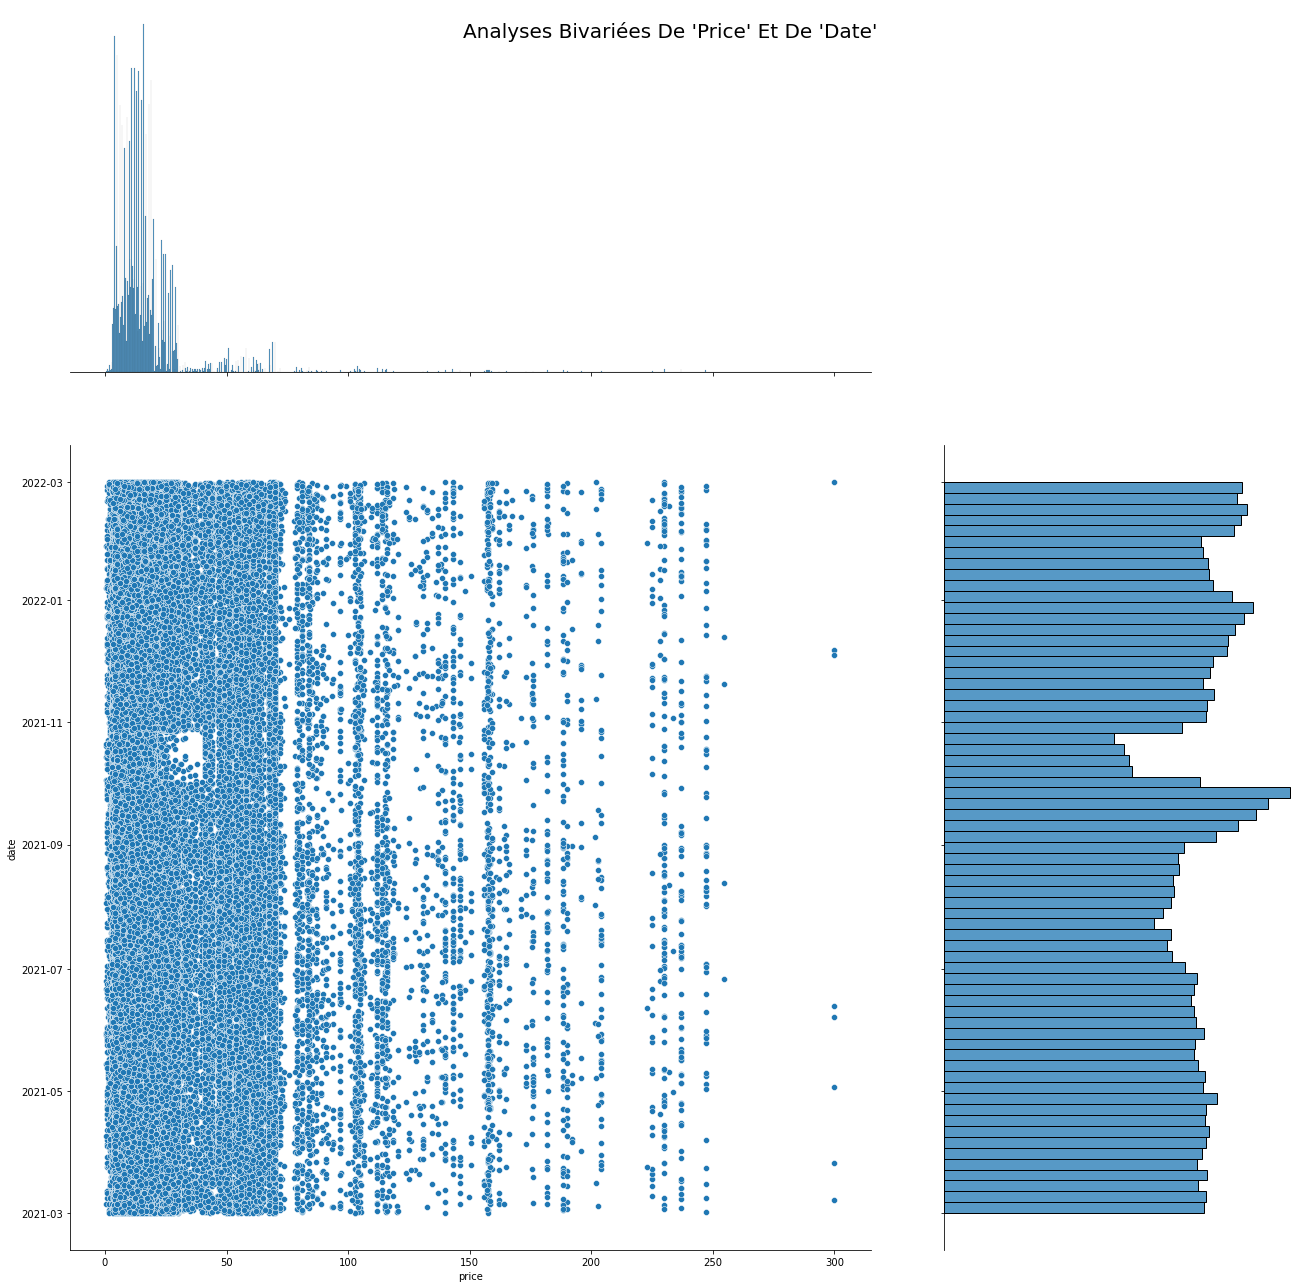

In [40]:

fig_name = "Analyses Bivariées De Price Et De Date.png"
plt.savefig(os.path.join(my_path, fig_name))

sns.jointplot('price', data_all_files.date , data=data_all_files, height=18, ratio=2)
plt.suptitle("Analyses Bivariées De 'Price' Et De 'Date'", fontsize=20)

plt.savefig(os.path.join(my_path, fig_name))
plt.show()


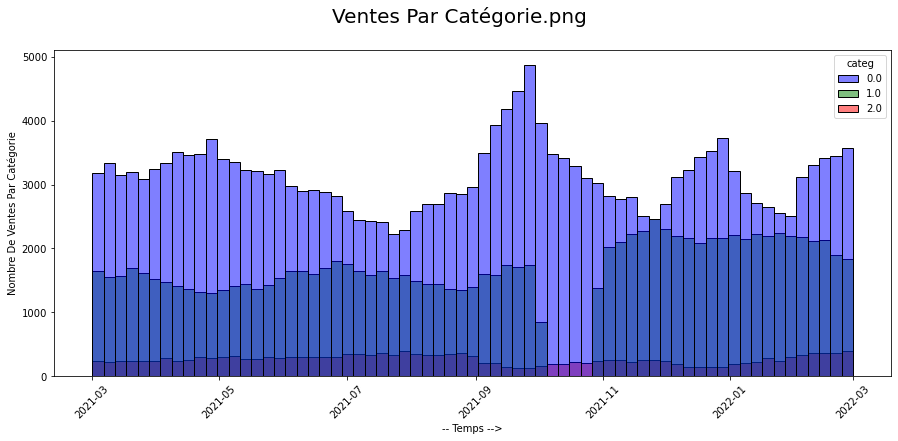

In [41]:
fig_name = "Ventes Par Catégorie.png"

plt.figure(figsize=(15,6))
sns.histplot(data_all_files, x='date', hue='categ', palette=["blue", "green", "red"])
plt.xticks(rotation=45)
plt.ylabel('Nombre De Ventes Par Catégorie')
plt.xlabel('-- Temps -->')
plt.suptitle(fig_name, fontsize=20)

plt.savefig(os.path.join(my_path, fig_name)) 
plt.show()


<font size="4">On voit sur l'histogramme des "Ventes Par Catégorie" que les produits de la catégorie 1 manquent sur le mois d'octobre.

On commence par supprimer les valeurs comprises entre '2021-10-01' & '2021-10-31'</font>

In [42]:
# Transactions du mois octobre
data_all_files_octobre = data_all_files[(data_all_files['date']>='2021-10-01') & (data_all_files['date']<='2021-10-31')]

data_all_files.drop(data_all_files_octobre.index, inplace=True) # Suppression des données du mois d'octobre

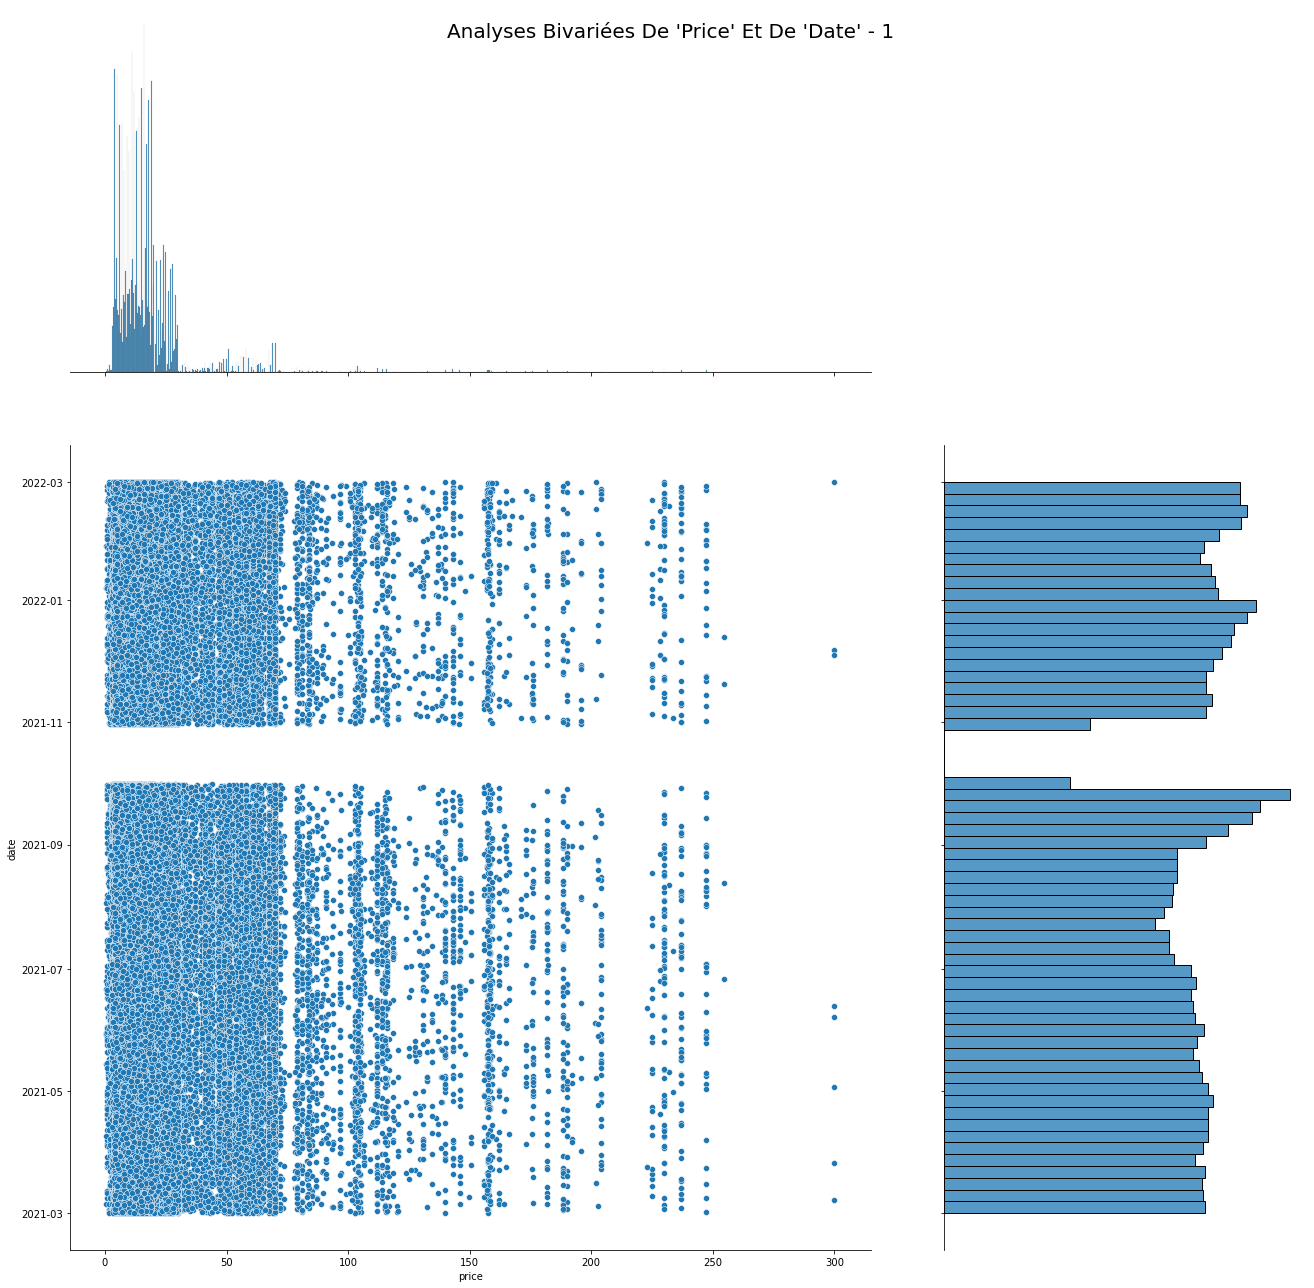

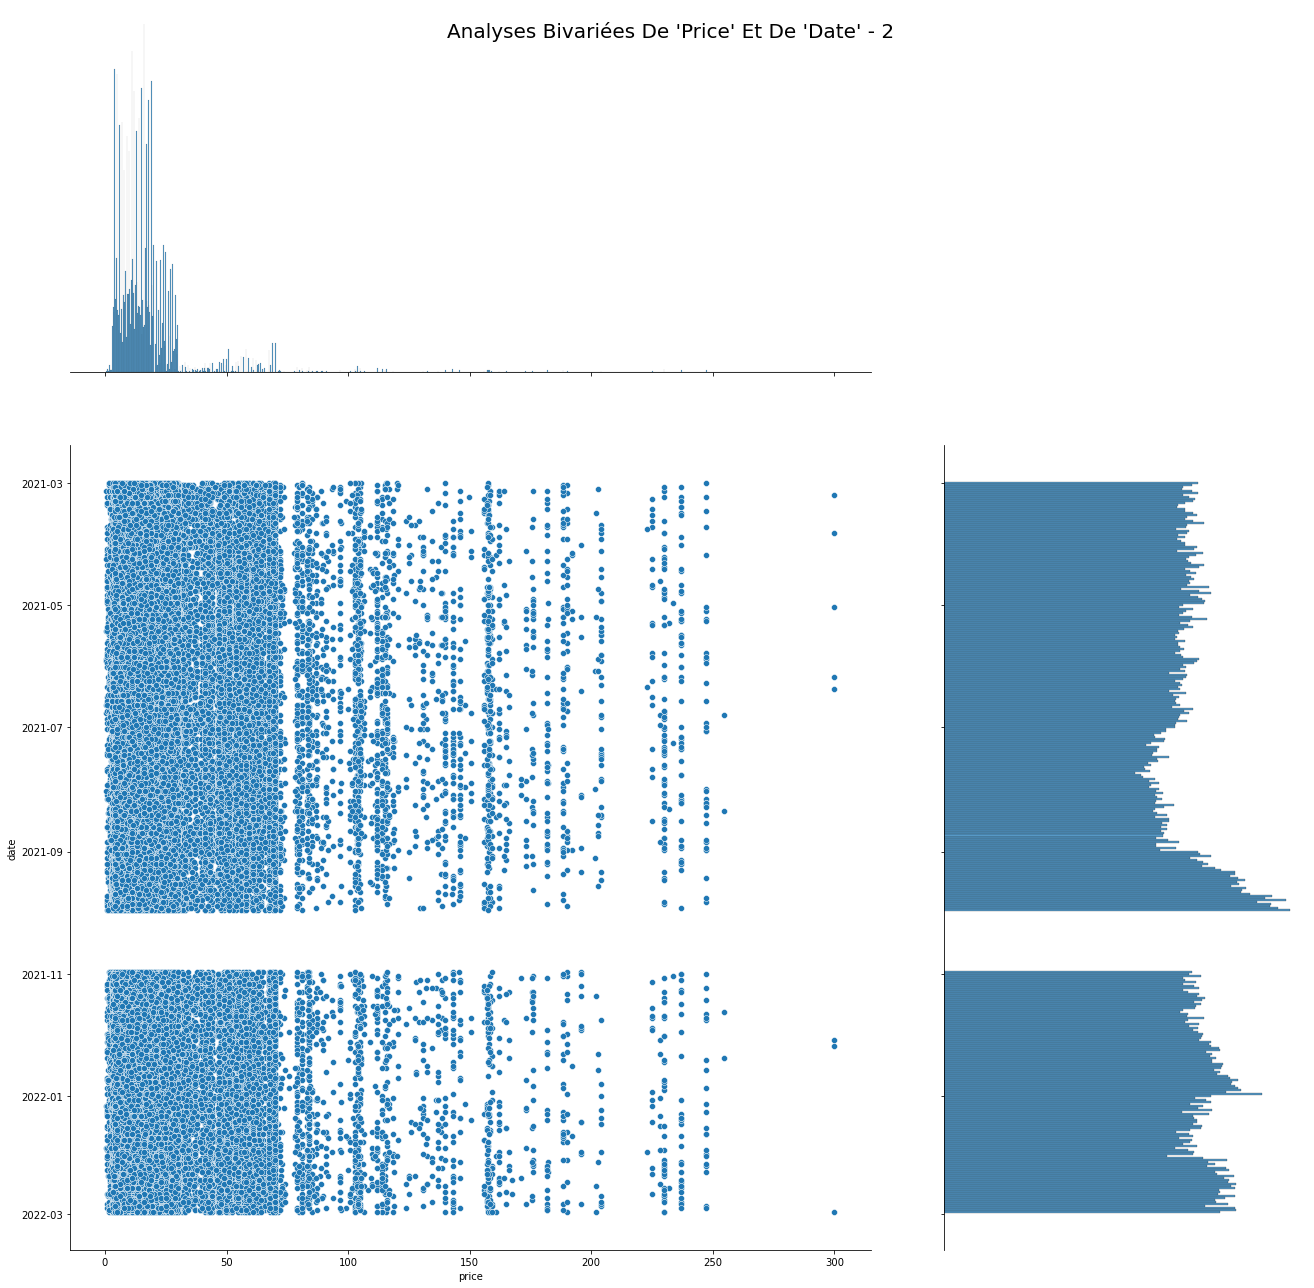

In [43]:
fig_name = "Analyses Bivariées De 'Price' Et De 'Date' - 1"
sns.jointplot('price', data_all_files.date , data=data_all_files, height=18, ratio=2)
plt.suptitle(fig_name, fontsize=20)
plt.savefig(os.path.join(my_path, fig_name))

fig_name = "Analyses Bivariées De 'Price' Et De 'Date' - 2"
sns.jointplot('price', data_all_files.date.dt.date , data=data_all_files, height=18, ratio=2)
plt.suptitle(fig_name, fontsize=20)
plt.savefig(os.path.join(my_path, fig_name))



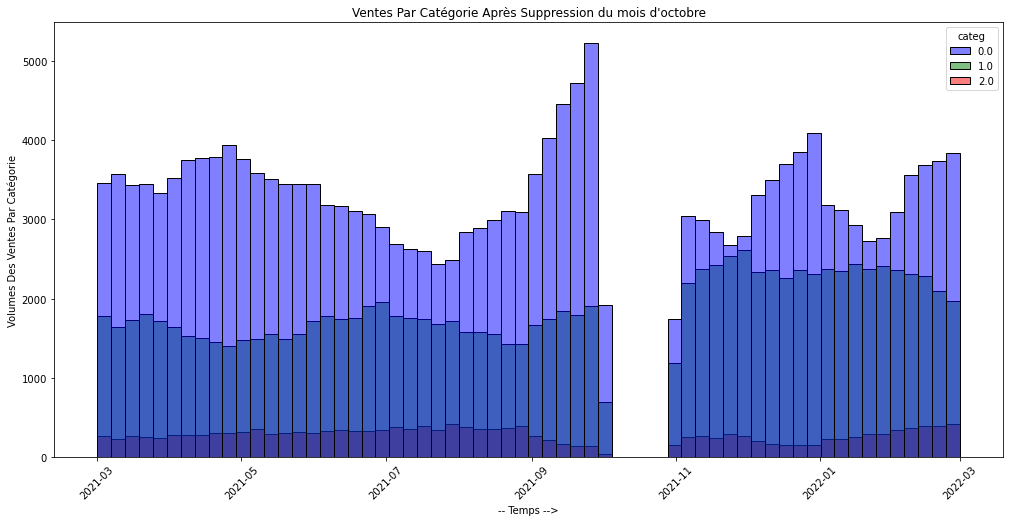

In [44]:
fig_name = "Ventes Par Catégorie Après Suppression du mois d\'octobre"

plt.figure(figsize=(17,8))
sns.histplot(data_all_files, x='date', hue='categ', palette=["blue", "green", "red"])
plt.xticks(rotation=45)
plt.title(fig_name)
plt.ylabel('Volumes Des Ventes Par Catégorie')
plt.xlabel('-- Temps -->')
plt.savefig(os.path.join(my_path, fig_name))
plt.show()




In [46]:
data_all_files.head()
data_all_files

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,3.99,0.0,f,1982
...,...,...,...,...,...,...,...,...
336810,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,23.37,1.0,f,1990
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
